In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math

In [33]:
df = pd.DataFrame([#["FromLiberal", 4.4457e-03, 7.69e-04, "***"],
                   #["FromConservative", 4.929e-03, 6.78e-04, "***"],
                   ["ToLiberal", -7.91e-04, 4.19e-04, "***"],
                   ["ToConservative", 1.154e-03, 3.60e-04, "***"],
                   ["Community", 5.610e-03, 2.64e-04, "***"],
                   ["Flair",-5.189e-03,6.43e-04,'***'],
                   ["Gold",-1.189e-03,4.24e-04,'***'],
                   ["FlairVisibility",-6.314e-03,1.676e-03,'***'],
                   ["PoliticalSubreddit",2.21410e-02,5.082e-03,'***'],
                   #["ParentToxicity",0.164355,3.98e-04,'***'],
                   ["LiberalToLiberal",3.064e-03,9.59e-04,'***'],
                   ["ConservativeToLiberal",6.817e-03,9.10e-04,'**'],
                   ["LiberalToConservative",7.690e-03,8.60e-04,'***'],
                   ["ConservativeToConservative",5.688e-03,7.52e-04,'***']
                   ],
                
                  columns=["term", "estimate", "error_bar", "sig"])

In [34]:
def single_plot_fig(df, title):
    plt.figure(figsize=(8,6))
    sns.set(font_scale=1)
    sns.set_style("white")
    
    max_value = max(math.fabs(df.estimate.min()), math.fabs(df.estimate.max()))
    norm = plt.Normalize(-1*max_value, max_value)
    sm = plt.cm.ScalarMappable(cmap="RdYlGn", norm=norm)
    
    #RdYlGn
    ax = sns.barplot(x="estimate", y="term",
                     data=df, 
                     palette=sm.to_rgba(df['estimate']))
    
    for index, (estimate, error) in enumerate(zip(df["estimate"], df["error_bar"])):
        plt.plot([estimate - error, estimate + error], [index, index],color="black")
    
    ax.axvline(0, color="black", lw="0.5")
    
    for p, (index,row) in zip(ax.patches, df.iterrows()):

        width = p.get_width()

        if p.get_width() > 0:
            plt.text(p.get_width(), p.get_y()+0.3,
                     row["sig"], fontsize=15,
                     ha='left', va='center')
        else:
            plt.text(p.get_width(), p.get_y()+0.3, 
                     row["sig"], fontsize=15,
                     ha='right', va='center')


    ax.set_xlabel("X-axis label")
    ax.set_ylabel("")
    ax.set_title(title)

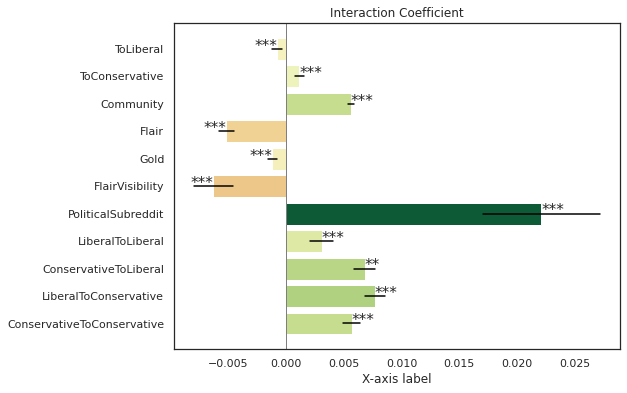

In [35]:
single_plot_fig(df, "Interaction Coefficient")
plt.savefig('../bad_actors/bad_actors_flip_counts/plots/smallInteractionCoefficient.pdf', dpi=300,facecolor='w',bbox_inches='tight')